In [1]:
##plot
from IPython.display import clear_output, display
import matplotlib.pylab as plt
import seaborn as sns; sns.set()
from matplotlib import colors
from itertools import cycle

#chem
import salty
import gains as genetic
from rdkit import Chem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.ML.Descriptors.MoleculeDescriptors import\
    MolecularDescriptorCalculator as calculator

/home/wesleybeckner/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline

import keras
from keras import objectives
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Multiply, Add
from keras.optimizers import Adam, Nadam
import salty
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from random import shuffle
import pandas as pd
import random

#Keras build
from keras import backend as K
from keras.objectives import binary_crossentropy #objs or losses
from keras.models import Model
from keras.layers import Input, Dense, Lambda, Layer
from keras.layers.core import Dense, Activation, Flatten, RepeatVector
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import GRU
from keras.layers.convolutional import Convolution1D

#cation data
cations = pd.read_csv('../data/cations.csv')
cations = cations['smiles_string']
salts = pd.read_csv('../data/salts.csv')
salts = salts['smiles_string']
categories = pd.read_csv('../data/categories.csv')
categories = categories['category']
coldic = pd.read_csv('../data/coldic.csv')
coldic = coldic.to_dict(orient='records')[0]
salt_coldic = pd.read_csv('../data/salt_coldic.csv')
salt_coldic = salt_coldic.to_dict(orient='records')[0]
salt_categories = pd.read_csv('../data/salt_categories.csv')
salt_categories = salt_categories['category']
density_coldic = pd.read_csv('../data/density_coldic.csv')
density_coldic = density_coldic.to_dict(orient='records')[0]
density_categories = pd.read_csv('../data/density_categories.csv')
density_categories = density_categories['category']

#supporting functions
import sys
sys.path.insert(0, '../')
from scripts import *

#training array info
smile_max_length = 105
import json
f = open("../data/salt_char_to_index.json","r")
char_to_index = json.loads(f.read())
char_set = set(char_to_index.keys())
char_list = list(char_to_index.keys())
chars_in_dict = len(char_list)

In [37]:
class latent_viewer(keras.callbacks.Callback):
    """
    custom callback to save vae models at 10 and 30 epochs
    """
    #supporting functions
    import sys
    import numpy as np
    import json
    sys.path.insert(0, '../')
    from scripts import TwoMoleculeVAE
    
    def on_epoch_end(self, epoch, logs={}):
        ### save model, will overwrite
        self.model.save("temp_{}.h5".format(self.model.name))
        
        ### prepare to load model
        f = open("../data/salt_char_to_index.json","r")
        char_to_index = json.loads(f.read())
        char_set = set(char_to_index.keys())
        vae = TwoMoleculeVAE()
        vae.create(char_set, char_set, qspr=True, 
                   weights_file='temp_{}.h5'.format(self.model.name),
                   qspr_outputs=1)
        
        #test the predictions
        x_train_cat = np.load('../data/{}_x_train_cat.npy'.format(self.model.name))
        z = vae.cation_encoder.predict(x_train_cat)
        z = np.array(z)
        np.save('latent_arrays/{}_{}.npy'.format(self.model.name, epoch), z)

In [ ]:
#######################
### SINGLE PROPERTY ###
#######################
properties = ['cpt', 'density', 'viscosity', 'thermal_conductivity']
epochs = 100
for prop in properties:

    gen3vae.create(char_set, char_set, qspr=True, 
                   weights_file='../models/gen3_2mol_1mil_GDB17_mix_pure_5.h5',
                   qspr_outputs=1)
    
    gen3vae.autoencoder.name = prop
    
    x_train_cat = np.load('../data/{}_x_train_cat.npy'.format(prop))
    x_train_ani = np.load('../data/{}_x_train_ani.npy'.format(prop))
    x_test_cat = np.load('../data/{}_x_test_cat.npy'.format(prop))
    x_test_ani = np.load('../data/{}_x_test_ani.npy'.format(prop))
    y_train = np.load('../data/{}_y_train.npy'.format(prop))
    y_test = np.load('../data/{}_y_test.npy'.format(prop))
    # view latent space development
    saver = latent_viewer()
    history = gen3vae.autoencoder.fit([x_train_cat, x_train_ani], [x_train_cat, x_train_ani, y_train],
                          shuffle=False,
                          validation_data=([x_test_cat, x_test_ani], [x_test_cat, x_test_ani, y_test]),
                          epochs=epochs,
                          callbacks=[saver])

Train on 1565 samples, validate on 174 samples
Epoch 1/100
1565/1565 [==============================] - 55s 35ms/step - loss: 5.5833 - cation_decoded_mean_loss: 0.0128 - anion_decoded_mean_loss: 0.2193 - qspr_loss: 5.3512 - cation_decoded_mean_acc: 0.9993 - cation_decoded_mean_mean_squared_error: 2.7701e-05 - anion_decoded_mean_acc: 0.9772 - anion_decoded_mean_mean_squared_error: 6.8677e-04 - qspr_acc: 0.0000e+00 - qspr_mean_squared_error: 5.3512 - val_loss: 0.3317 - val_cation_decoded_mean_loss: 0.0123 - val_anion_decoded_mean_loss: 0.0936 - val_qspr_loss: 0.2258 - val_cation_decoded_mean_acc: 0.9995 - val_cation_decoded_mean_mean_squared_error: 2.4139e-05 - val_anion_decoded_mean_acc: 0.9855 - val_anion_decoded_mean_mean_squared_error: 3.4195e-04 - val_qspr_acc: 0.0000e+00 - val_qspr_mean_squared_error: 0.2258
Epoch 2/100
1565/1565 [==============================] - 47s 30ms/step - loss: 1.1926 - cation_decoded_mean_loss: 0.0108 - anion_decoded_mean_loss: 0.0747 - qspr_loss: 1.1070 -

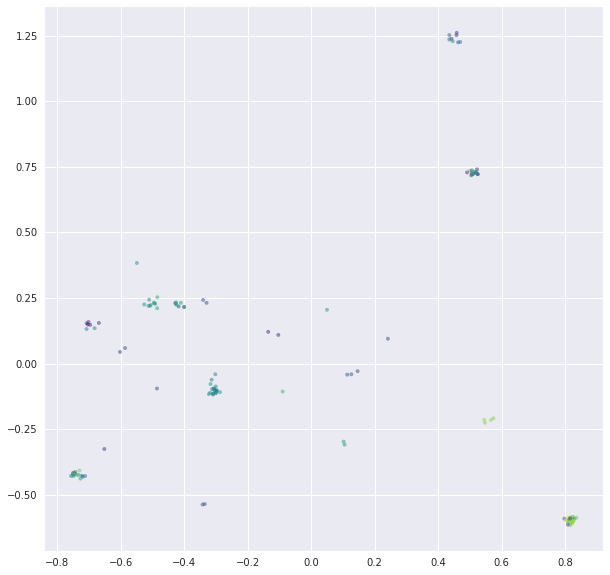

In [48]:
z = np.load('cation_embeddings_latent_test_thermal_conductivity_1.npy')
y_train = np.load('../data/{}_y_train.npy'.format(prop))
pca = PCA(n_components=2)
pcs = pca.fit_transform(z)
fig, axs = plt.subplots(1,1, figsize=(10,10), sharex=True, sharey=True)
axs.scatter(pcs[:,0], 
                    pcs[:,1],
             marker='.',
                c=np.exp(y_train), alpha=0.5, cmap='viridis')

In [3]:
vae = MoleculeVAE()
vae.create?

Signature: vae.create(charset, max_length=105, latent_rep_size=292, weights_file=None, qspr=False, conv_layers=3, gru_layers=3, conv_filters=9, conv_kernel_size=9, gru_output_units=501)
Docstring: <no docstring>
File:      /media/wesleybeckner/weshhd/wes/Dropbox/Python/py3/generative_learners_salts/notebooks/<ipython-input-2-837442963518>
Type:      method


In [6]:
convs = random.randint(3,10) #3 original
grus = random.randint(3,10) #3 original
conv_filters = random.randint(9,12) #9 original
conv_kernel_size = random.randint(9,15) #9 original
gru_output_units = random.randint(450,1000) #501 original
latent_rep_size = random.randint(250,600) #292 original
{'convolutions': convs, 'GRUs': grus, 'conv_filter_size': conv_filters,
 'conv_kernel_size': conv_kernel_size, 'gru_output_units': gru_output_units, 
 'latent_rep_size': latent_rep_size}
print(convs, grus, conv_filters, conv_kernel_size, gru_output_units, latent_rep_size)
vae.create(char_set, 
           max_length=105, 
           latent_rep_size=latent_rep_size, 
           weights_file=None,
           qspr=False,
           conv_layers=convs,
           gru_layers=grus,
           conv_filters=conv_filters,
           conv_kernel_size=conv_kernel_size,
           gru_output_units=gru_output_units)

6 9 9 14 925 338


In [61]:
import json
import sys
from sklearn.model_selection import train_test_split

def model_search(iterations=10, data_size=100000):
    """
    Parameters
    ----------
    iterations: int, default 10
        number of iterations for random search
    datasize: int, default 100,000
        epoch training size, max 1M when reading
        from GDB17.1000000
        
    Returns
    -------
    vae: keras model
    history: keras training history
    """b
    for it in range(iterations):
        convs = random.randint(3,10) #3 original
        grus = random.randint(3,10) #3 original
        conv_filters = random.randint(9,12) #9 original
        conv_kernel_size = random.randint(9,15) #9 original
        gru_output_units = random.randint(450,1000) #501 original
        latent_rep_size = random.randint(250,600) #292 original
        
        di = {'convolutions': convs, 'GRUs': grus, 'conv_filter_size': conv_filters,
         'conv_kernel_size': conv_kernel_size, 'gru_output_units': gru_output_units, 
         'latent_rep_size': latent_rep_size}
        print(di)
        

        f = open("../data/salt_char_to_index.json","r")
        char_to_index = json.loads(f.read())
        char_set = set(char_to_index.keys())
        char_list = list(char_to_index.keys())
        chars_in_dict = len(char_list)
        
        vae = MoleculeVAE()
        vae.create(char_set, 
           max_length=105, 
           latent_rep_size=latent_rep_size, 
           weights_file=None,
           qspr=False,
           conv_layers=convs,
           gru_layers=grus,
           conv_filters=conv_filters,
           conv_kernel_size=conv_kernel_size,
           gru_output_units=gru_output_units)
        
        df = pd.read_csv('../data/GDB/GDB17.1000000', names=['smiles'])
        histories = []
        for p in range(0,5):
            selected = df['smiles'][data_size*p:data_size*(p+1)].reset_index(drop=True)
            sel2 = selected.copy()
            random.shuffle(sel2)
            values = pd.Series(selected.values + '.' + sel2.values)
            print(len(values))
            padded_smiles =  [pad_smiles(i, smile_max_length) for i in values if pad_smiles(i, smile_max_length)]
            X_train = np.zeros((data_size, smile_max_length, chars_in_dict), dtype=np.float32)

            for i, smile in enumerate(padded_smiles):
                for j, char in enumerate(smile):
                    X_train[i, j, char_to_index[char]] = 1
            X_train, X_test = train_test_split(X_train, test_size=0.01, random_state=42) 
            history = vae.autoencoder.fit(X_train, X_train, shuffle = False, validation_data=(X_test, X_test))
            histories.append(history.history)
    
        vae.save('../models/{}.h5'.format(di))
        with open('../models/history_{}.json'.format(di), 'w') as f:
            json.dump(histories, f)